Here goes the fibroblast EMD-PCA code and the pure DE heatmaps from the sup

In [1]:
library(tidyverse)
library(Seurat)
library(patchwork)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.11.1-CAPI-1.17.1
and GEOS at installation 3.10.3-CAPI-1.16.1differ”
Attaching SeuratObject

Attaching sp

Loading required package: grid

ComplexHeatmap version 2.12.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The 

# EMD-based condition embeddings

Integrated object with all fibroblast cells was generated as shown in the Epithelial notebook within this folder.
This object contains only fibroblast cells from the 1st Run.

The resulting object can be found in the *DATA REPO* and loaded as follows:

#Load object:

    d_Fig1_INTfib <- readRDS("../ZenodoRepo/d_Fig1_INTfib.rds")
    d_Fig1_INTfib@active.assay <- "RNA"
    d_Fig1_INTfib

Compute EMD using cygnal as described in the Epithelial notebook.

In [2]:
#Load EMD scores and plot DR

    EMD_fib <- read_tsv("data/EMD_fib.txt") %>%
                select(-starts_with("median")) %>% 
                select(-starts_with("denominator")) %>% 
                spread(marker, EMD_no_norm_arc) %>% 
                column_to_rownames(., var = "file_origin")
    EMD_fib <- EMD_fib[,!apply(EMD_fib, MARGIN=2, function(x) max(x, na.rm = TRUE) == min(x, na.rm = TRUE))]
    EMD_fib

Rows: 93200 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): denominator, file_origin, marker
dbl (4): EMD_no_norm_arc, median_diff_no_norm_arc_compare_from_vs_to, median...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,0610005C13Rik,0610009B22Rik,0610009E02Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,0610038B21Rik,0610039K10Rik,⋯,9930120I10Rik,993_Mki67,994_Mgmt,995_Gm16201,996_286_Adam8,997_Ifitm2,998_Ifitm1,998_Ifitm10,999_Ifitm3,9_Neurl3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
exportData_cocultAFib_fib.txt,0.0012116111,0.02685705,0.005615268,0.03791584,0.06263519,-0.2021186,0.0017971817,0.03527007,0.005666070,0.01726458,⋯,0.002589538,0.03232354,-0.13697360,0.002081078,0.0053617570,-0.48028349,-0.2543599,0.0084811179,-0.26197242,0.017568319
exportData_cocultAKFib_fib.txt,0.0014209375,0.07797182,0.006388998,0.04113540,0.07649779,-0.2124489,0.0009102418,0.03734049,0.008423694,0.01345615,⋯,0.007065721,0.01180914,-0.08819479,0.008345403,0.0003603613,0.08749522,-0.2869248,0.0033039902,-0.06494103,0.009808468
exportData_cocultAKMacFib_fib.txt,0.0005233261,-0.18866529,0.005928998,0.02977744,0.05261162,-0.5343949,0.0025186296,0.08627955,0.015909499,0.01957199,⋯,0.012143161,0.05460271,-0.22474480,0.023388640,0.0591117279,-0.53967251,-0.2544078,0.0009744949,-0.61588859,0.008507572
exportData_cocultAKPFib_fib.txt,0.0004442785,0.07024965,0.006197392,0.03317128,0.05195420,-0.1348725,0.0009646864,0.03650247,0.009483011,0.01195169,⋯,0.003086630,0.01872675,-0.03922109,0.007093817,0.0030713198,0.11198381,-0.3026679,0.0050732294,0.04832192,0.006226556
exportData_cocultAKPMacFib_fib.txt,0.0005423796,-0.19772869,0.010161674,0.01504849,0.01071390,-0.5700333,0.0025186296,0.09376153,0.018468422,0.01855127,⋯,0.020617389,0.05063309,-0.24494915,0.025504419,0.0410748748,-0.65624416,-0.2777213,0.0014956584,-0.76732874,0.006410415
exportData_cocultAMacFib_fib.txt,0.0016662423,-0.14561573,0.003792362,0.02018526,0.05548708,-0.4684114,0.0025186296,0.02697754,0.005552595,0.01743524,⋯,0.002217156,0.06575505,-0.20875994,0.001895120,0.0362304552,-0.80853805,-0.3455389,0.0074285328,-0.85091887,0.017377722
exportData_cocultMacFib_fib.txt,0.0010186129,-0.28133924,0.008717102,0.03653080,0.12108546,-0.7145100,0.0016429432,0.10110286,0.004678122,0.01895807,⋯,0.026710277,0.03180985,-0.18321155,0.014943110,0.0516949763,-1.10074592,-0.4148245,0.0016552141,-1.40565099,0.036530760
exportData_cocultWTFib_fib.txt,0.0006119846,0.10164727,0.002788921,0.03324697,0.06273050,-0.2009560,0.0013176027,0.04409730,0.002752848,0.01258221,⋯,0.006611284,0.02205751,-0.11826307,0.004416922,0.0034013750,-0.35589502,-0.2433796,0.0051666011,-0.13169460,0.018616482
exportData_cocultWTMacFib_fib.txt,0.0018268968,-0.13381871,0.006323438,0.02736826,0.04355288,-0.4970722,0.0025186296,0.03511373,0.008382749,0.01908414,⋯,0.004954635,0.06251921,-0.22100332,0.004478359,0.0535272061,-0.95633823,-0.3540392,0.0045548560,-0.90811170,0.013705167


<!-- #Add here a snippet of code to refactor/rewrite conditions as shown in /SampleDF_scRNAseq -->

In [3]:
pcaEMD_fib <- prcomp(EMD_fib, center=TRUE, scale=TRUE)

# factoextra::fviz_pca_ind(pcaEMD_epi) + egg::theme_article()

pcaEMD_fib <- as.data.frame(pcaEMD_fib$x) %>% select(PC1,PC2) %>% rownames_to_column(var="Condition")

pca_plot <- ggplot(pcaEMD_fib, aes(x=PC1, y=PC2, colour=Condition)) +
geom_point() +
ggrepel::geom_text_repel(aes(label=Condition)) +
guides(colour="none") +
egg::theme_article()

In [4]:
phateEMD_fib <- phateR::phate(EMD_fib,
    knn = 2, decay = 40, t = "auto",
    knn.dist.method = "euclidean",
    mds.solver = "sgd", mds.method = "metric", mds.dist.method = "euclidean",
    n.jobs = 1, seed = 12)
phateEMD_fib <- as.data.frame(phateEMD_fib$embedding) %>% rownames_to_column(var="Condition")

phate_plot <- ggplot(phateEMD_fib, aes(x=PHATE1, y=PHATE2, colour=Condition)) +
geom_point() +
ggrepel::geom_text_repel(aes(label=Condition)) +
guides(colour="none") +
egg::theme_article()

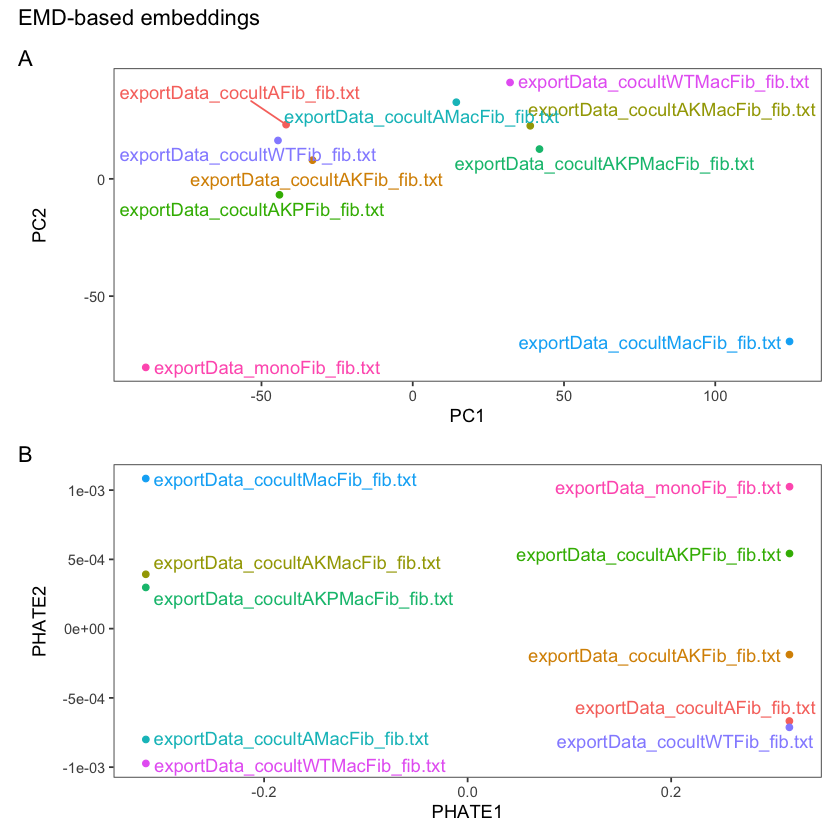

In [5]:
pca_plot + phate_plot + 
plot_layout(ncol=1, nrow = 2) +
plot_annotation(title="EMD-based embeddings",
    tag_levels = "A")

# DE of ALL fibroblast cells

Generate new integrated object with all fibroblast cells from both runs.

#Define input directories

    data_dir1 <- "~/PhD/S_210125_CRCTME_Jan21/Analysis/Final_Analysis/Output_Datasets/"
    data_dir2 <- "~/PhD/S_210125_CRCTME_Jan21/CRCTME_story/Integration_CRCTME-Aug21/RData/"

#Load data from Run 1

    dlist_OrgCocultWT <- readRDS(paste0(data_dir1,"crctmeWT.rds"))
    dlist_OrgCocultA <- readRDS(paste0(data_dir1,"crctmeA.rds"))
    dlist_OrgCocultAK <- readRDS(paste0(data_dir1,"crctmeAK.rds"))
    dlist_OrgCocultAKP <- readRDS(paste0(data_dir1,"crctmeAKP.rds"))
    dlist_MacFib <- readRDS(paste0(data_dir1,"tmecontrols.rds"))

    dlist_r1INTfib <- c(
        dlist_OrgCocultWT, dlist_OrgCocultA, dlist_OrgCocultAK, dlist_OrgCocultAKP,
        dlist_MacFib
    )
    rm(dlist_OrgCocultWT, dlist_OrgCocultA, dlist_OrgCocultAK, dlist_OrgCocultAKP,
        dlist_MacFib)

    dlist_INTfib <- c()
    for (i in 1:length(dlist_r1INTfib)) {
        if (grepl("Fib", dlist_r1INTfib[[i]]@project.name, fixed = TRUE)) {
            dlist_INTfib <- append(dlist_INTfib, dlist_r1INTfib[[i]])
        }
    }
    for (i in 1:length(dlist_INTfib)) {
        names(dlist_INTfib)[i] <- dlist_INTfib[[i]]@project.name
        #Store the cluster annotations found in the active.ident slot of the Run1 datasets into the metadata
        dlist_INTfib[[i]]@meta.data$clusters <- dlist_INTfib[[i]]@active.ident
        dlist_INTfib[[i]]@active.assay <- "RNA"
    }
    rm(dlist_r1INTfib)

#View names of objects and the names of the clusters

    for (i in 1:length(dlist_INTfib)) {
        p1 <- DimPlot(dlist_INTfib[[i]], reduction = "pca", group.by = "clusters") +
            egg::theme_article()
        p2 <- FeaturePlot(dlist_INTfib[[i]], reduction = "pca",
            features = c("Epcam", "Pdgfra","Ptprc"), combine = FALSE)
        print(p1+p2+
            plot_layout(ncol=2, nrow = 2)+
            plot_annotation(title=names(dlist_INTfib)[i],
                tag_levels = "A")
        )
    }

    dlist_INTfib

#Select those starting with f

    for (i in 1:length(dlist_INTfib)) {
        dlist_INTfib[[i]] <- subset(dlist_INTfib[[i]], idents = levels(
            dlist_INTfib[[i]]@meta.data$clusters)[startsWith(levels(dlist_INTfib[[i]]@meta.data$clusters),
            "f")]
        )
    }
    dlist_INTfib

#Load data from Run 2

    dlist_Run2 = readRDS(paste0(data_dir2, "aug21_WTorg.rds"))

    for (i in 1:length(dlist_Run2)) {
        names(dlist_Run2)[i] <- dlist_Run2[[i]]@project.name
        #Store the cluster annotations found in the active.ident slot of the Run1 datasets into the metadata
        dlist_Run2[[i]]@meta.data$clusters <- dlist_Run2[[i]]@active.ident
        dlist_Run2[[i]]@active.assay <- "RNA"
        p1 <- DimPlot(dlist_Run2[[i]], reduction = "pca", group.by = "clusters") +
            egg::theme_article()
        p2 <- FeaturePlot(dlist_Run2[[i]], reduction = "pca",
            features = c("Epcam", "Pdgfra","Ptprc"), combine = FALSE)
        print(p1+p2+
            plot_layout(ncol=2, nrow = 2)+
            plot_annotation(title=names(dlist_Run2)[i],
                tag_levels = "A")
        )
    }


#Select those clusters with fib marker expression in the cocultures

    dlist_INTfib <- append(dlist_INTfib,
        c(
            subset(dlist_Run2[[1]], subset = seurat_clusters %in% c(2,3,4)),
            subset(dlist_Run2[[2]], subset = seurat_clusters %in% c(2,3)),
            subset(dlist_Run2[[3]], subset = seurat_clusters %in% c(1,3,4))
        ))
    rm(dlist_Run2)

Integration steps as shown in other notebooks (QC, prep, integrate)

#QC

    for (i in 1:length(dlist_INTfib)) {
    dlist_INTfib[[i]] <- subset(dlist_INTfib[[i]],
                                subset = mito_content<2.4 &
                                        nFeature_RNA>2000 &       
                                            nFeature_RNA<7600
                                )
        print(VlnPlot(dlist_INTfib[[i]], features = c("nFeature_RNA", "nCount_RNA",
                                                "mito_content"),
                    ncol = 3, assay = "RNA", group.by = "seurat_clusters", stack = FALSE) &
            xlab(""))
    
    }

In [6]:
#QC expression of fibroblast markers

    fib_markers <- c("Pdgfra", "Dcn","Ptn","C3")



    copy_Seuratlist <- c()
    for (i in 1:length(dlist_INTfib)) {
        copy_Seuratlist <- append(copy_Seuratlist,
                                subset(dlist_INTfib[[i]],
                                        Dcn>0 & Ptn>0
                                        )
                            )
    }
    for (i in 1:length(copy_Seuratlist)) {
        print(copy_Seuratlist[[i]]@project.name)
        print(dim(copy_Seuratlist[[i]]))
        print(VlnPlot(copy_Seuratlist[[i]], 
                        features = c("nFeature_RNA", "nCount_RNA",
                                    "mito_content"),
                        ncol = 3, assay = "RNA", group.by = "seurat_clusters", 
                        stack = FALSE) &
            xlab(""))
    }

#Integrate

    for (i in 1:length(dlist_INTfib)) {
        dlist_INTfib[[i]] <- NormalizeData(
                                dlist_INTfib[[i]],
                                assay="RNA",
                                normalization.method = "LogNormalize",
                                scale.factor = 10000
        )
        print(summary(as.data.frame(dlist_INTfib[[i]]@assays$RNA@data))[,1:3])
    }

    INTfib_feats <- SelectIntegrationFeatures(object.list=dlist_INTfib, 
        nfeatures =3000)
    dlist_INTfib <- PrepSCTIntegration(object.list=INTfib_list, 
        anchor.features=INTfib_feats)
    dlist_INTfib <- lapply(X = dlist_INTfib,
        FUN = RunPCA,
        features = INTfib_feats,
        assay = "SCT", reduction.name="pca")

    INTfib_anchors <- FindIntegrationAnchors(dlist_INTfib, normalization.method = "SCT",
        anchor.features = INTfib_feats,
        reduction = "rpca", k.anchor = 12)

    d_FigS1_INTfib <- IntegrateData(anchorset = INTfib_anchors, 
                                    normalization.method = "SCT")

In [ ]:
#Load integrated object from *DATA REPO*

    d_FigS1_INTfib <- readRDS("../ZenodoRepo/d_FigS1_INTfib.rds")
    d_FigS1_INTfib

An object of class Seurat 
55548 features across 24431 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 1 dimensional reduction calculated: pcaFIB

PC_ 1 
Positive:  Dcn, Ptn, Rbp1, Igfbp5, Il33, Sfrp1, Gas6, Tmem176b, Ptgis, Rhox5 
	   Dlk1, Cthrc1, Pdgfra, Mgp, Rpl18, Csrp2, Rps11, Rpl22l1, Wfdc17, Lbp 
	   Fabp5, Pclaf, Rpsa-ps10, Pdlim4, Cd34, Fau, Stmn1, Timp3, Birc5, Tyms 
Negative:  Ifitm1, Ifi27l2a, Ifitm3, Hgf, Ly6c1, S100a4, Ctsl, Sod2, Ifitm2, Prkg2 
	   Cebpd, Vcan, Ereg, Ccl2, Gdpd2, Slpi, Grem1, Isg15, H2bc4, Ppp1r14a 
	   Ifitm6, Tslp, Mt2, Cxcl1, Gucy1b1, Tmem167, Serpina3i, Adamts1, Gm28710, Lmo4 
PC_ 2 
Positive:  Spp1, Tagln, Acta2, Lgals1, Tnc, Tyms, Pclaf, Prkg2, Csrp2, Pmepa1 
	   Oaf, Cthrc1, Stmn1, Inhba, Mmp9, Birc5, Actg2, Tnfrsf12a, Tgfb1, Ass1 
	   Dut, Cald1, Myl9, Smc2, Ranbp1, Ube2c, Top2a, Cdk1, Rad51ap1, Spc24 
Negative:  Saa3, Dcn, Gas6, Lcn2, Lbp, Cd302, Pdgfra, C3, Hp, Wfdc17 
	   Sfrp1, Tmem176b, Rasl11a, Abi3bp, Ier3, Wnt4, Ptn, Mgst1, Cxcl12, Igfbp5 
	   Il33, Clu, Abcc3, Tmem176a, Cebpd, Adamts5, Mt1, Hspb1, Hsd11b1, Camp 
PC_ 3 
Positive:  Bsg, Fam162a, P4ha2, Sparc, Timp3, Col3a1, Col1a1, 

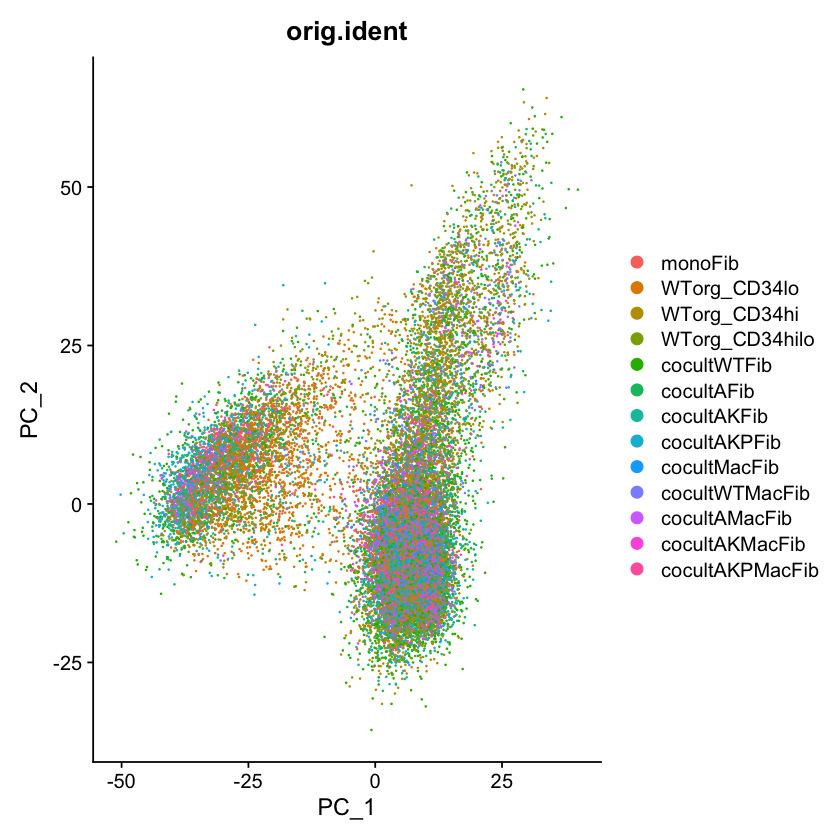

Centering and scaling data matrix



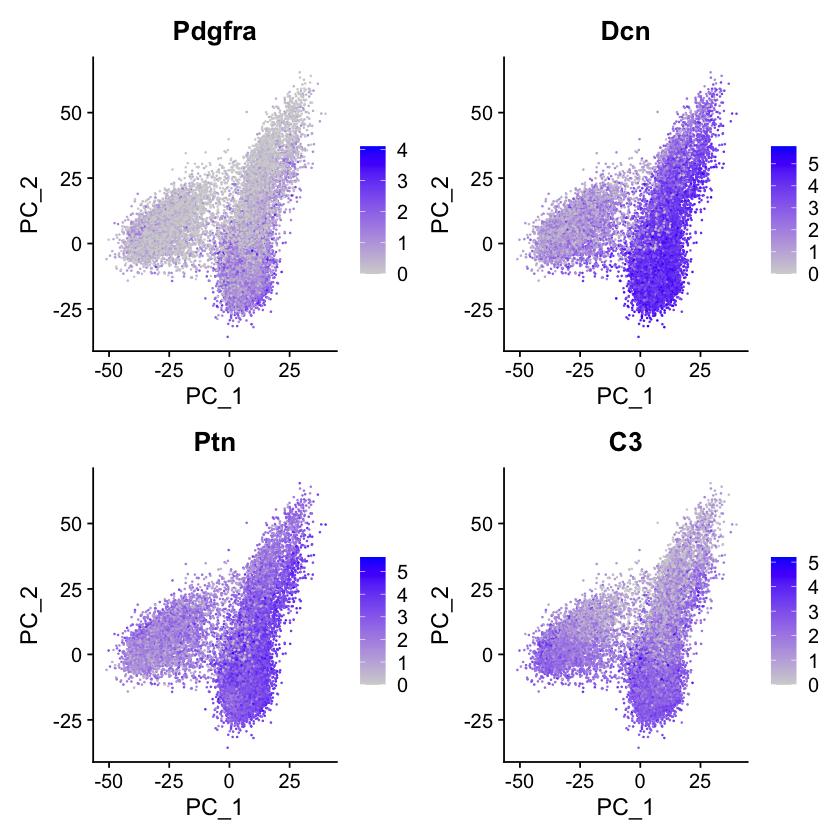

In [8]:
d_FigS1_INTfib <- RunPCA(d_FigS1_INTfib, assay="integrated", reduction.name="pcaFIB")
DimPlot(d_FigS1_INTfib, reduction = "pcaFIB", group.by = "orig.ident", shuffle = TRUE)

d_FigS1_INTfib@active.assay <- "RNA"
FeaturePlot(d_FigS1_INTfib, features = fib_markers)
d_FigS1_INTfib@active.assay <- "integrated"

#Popoulate scale.data slot on  RNA assay from the normalised values in @data
d_FigS1_INTfib <- ScaleData(d_FigS1_INTfib, features=rownames(d_FigS1_INTfib@assays$SCT), assay="RNA")

## Differential Expression

Compute diffrentially expressed genes between the different datasets containing fibroblasts.

We will use the non-integrated features (RNA assay) so we should not be masking any possible batch effects.

In [5]:
#Compute DE genes of each dataset with FindAllmarkers

    d_FigS1_INTfib <- SetIdent(d_FigS1_INTfib, value="orig.ident")
    gDE_INTfib_orig <- FindAllMarkers(
                        d_FigS1_INTfib, assay = "RNA",
                        min.pct = 0.1, only.pos = FALSE, test.use = "wilcox", 
                        random.seed = 12)
    write_csv(gDE_INTfib_orig,"data/gDE_INTfib_orig.csv")
    gDE_INTfib_orig_n6 <- gDE_INTfib_orig %>% group_by(cluster) %>% slice_max(n=6, order_by = c(abs(avg_log2FC)))
    gene_list <- unique(gDE_INTfib_orig_n6$gene)
    gene_list

Calculating cluster monoFib

Calculating cluster WTorg_CD34lo

Calculating cluster WTorg_CD34hi

Calculating cluster WTorg_CD34hilo

Calculating cluster cocultWTFib

Calculating cluster cocultAFib

Calculating cluster cocultAKFib

Calculating cluster cocultAKPFib

Calculating cluster cocultMacFib

Calculating cluster cocultWTMacFib

Calculating cluster cocultAMacFib

Calculating cluster cocultAKMacFib

Calculating cluster cocultAKPMacFib



[1] "Spp1"       "Hp"         "Lcn2"       "Fam162a"    "Pgk1"      
 [6] "CT010467.1" "Dcn"        "Igfbp5"     "Gm5886"     "Pdgfra"    
[11] "Gas6"       "Krt18"      "Ifi27l2a"   "Clu"        "Col1a2"    
[16] "Mt2"        "Saa3"       "Uba52"      "Nme2"       "Neat1"     
[21] "Gm10076"    "Atp5l"      "Il33"       "Egln1"      "Higd1a"    
[26] "Eno1"       "Tagln"      "Acta2"      "Tnfrsf12a"  "Wfdc17"    
[31] "Tmsb10"     "Rps28"      "Timp1"      "Gapdh"      "Ccl2"      
[36] "Isg15"      "Irf7"       "Timp3"      "Ccl5"       "Cxcl10"    
[41] "mt-Atp6"    "Txnip"      "Calm1"

In [9]:
#Append CD34high VS low and reorder as shown in Figure S1
gene_list <- c(
    "Neat1","Mt2","Txnip","Igfbp5", "Col1a2", "mt-Atp6", "Timp3", 
    "CT010467.1", "Lcn2", "Saa3", "Hp", "Gas6", "Clu", "Wfdc17", "Il33",
    "Atp5l", "Nme2", "Gm10076", "Uba52", "Rps28", "Calm1", "Krt18", "Tagln", 
    "Acta2", "Tnfrsf12a", "Spp1", "Timp1", "Cxcl10", "Ccl5", "Higd1a", "Eno1",
    "Pgk1", "Fam162a", "Gapdh", "Tmsb10", "Egln1", "Ifi27l2a", "Isg15", "Irf7", 
    "Ccl2", "Gm5886",

    "Cd34","Dcn","Pdgfra",
    "Thy1","Adamts1","Ifitm1"
)

### Heatmap

In [10]:
    mat_FigS1_INTfib <- d_FigS1_INTfib[["RNA"]]@scale.data[gene_list,] %>% 
                    as.matrix()
    mat_FigS1_INTfib

,AAACCCACAGCTTCCT-1_1,AAACCCAGTTCGAGCC-1_1,AAACGAAAGAAGGATG-1_1,AAACGAACACCAGCTG-1_1,AAACGAACACCGTGCA-1_1,AAACGAACATACTTTC-1_1,AAACGCTCACAGCCAC-1_1,AAACGCTCATGACTAC-1_1,AAACGCTGTATCCCAA-1_1,AAACGCTGTCAAGGCA-1_1,⋯,TTTCGATCAGGTACGA-1_13,TTTCGATCATACAGAA-1_13,TTTCGATGTGTTCGAT-1_13,TTTCGATGTTCAAAGA-1_13,TTTCGATTCCCAACTC-1_13,TTTGACTAGGGTTGCA-1_13,TTTGACTCAGAGAAAG-1_13,TTTGATCGTGGATCAG-1_13,TTTGGAGAGAGAGAAC-1_13,TTTGGTTTCGAACGGA-1_13
Neat1,-0.52235756,-0.495376865,-1.098669692,-1.277657899,0.68905077,-0.17269383,0.51886974,-1.56452947,-0.787518617,0.86558082,⋯,0.488261881,-0.9606231815,1.08620280,-0.62078028,1.16336361,1.30519932,0.69631213,0.948016212,0.14795452,1.05539599
Mt2,-0.23017143,-1.047909043,1.269902154,-0.371466551,0.51764830,-1.15829116,1.76724385,-0.68337005,0.321456089,1.36100338,⋯,0.111297326,-0.8156678533,-0.75271782,0.23142390,-0.50896847,0.07687993,0.86196160,0.513025757,0.66971116,1.34951492
Txnip,-1.47204972,-0.858342238,0.234357044,-0.424315796,-0.84142968,0.25582274,-1.05936181,-0.63870687,0.683233369,-0.77879637,⋯,-1.472049716,-1.4720497164,-0.83810402,0.59810808,-0.01986153,-0.69380456,-1.23346984,0.004661606,-1.12093607,-0.51007684
Igfbp5,0.49174298,0.850291447,-0.775975489,0.161066071,0.27155777,1.40220811,-0.77597549,-0.77597549,0.536579561,-0.77597549,⋯,-0.775975489,-0.7759754890,-0.77597549,-0.02915267,-0.77597549,-0.77597549,-0.77597549,-0.775975489,-0.77597549,-0.77597549
Col1a2,0.44997725,0.493518416,-1.145760727,-0.912342916,0.43861985,-0.41589261,-0.17536442,-0.20228454,-0.004098263,0.74587049,⋯,-0.975836332,-0.3353879099,0.18048371,-0.08611334,-0.21249001,-1.15865439,-0.50306859,0.565906897,-1.08224147,-0.63980855
mt-Atp6,-0.84671043,-0.846710435,-0.846710435,-0.846710435,0.53063532,-0.84671043,0.05464679,-0.84671043,-0.846710435,-0.84671043,⋯,0.687025327,0.0947135730,0.79572079,-0.84671043,-0.30053530,1.24336229,0.11072541,0.031560019,0.51623337,1.59624132
Timp3,-1.22742215,-1.227422153,-0.587064599,-0.067324377,1.14156602,0.68575538,-0.15580343,-1.22742215,0.843454574,-1.22742215,⋯,-1.227422153,-1.2274221531,-1.22742215,-0.77127780,-1.22742215,-0.59723222,-0.38479618,0.046182453,-0.53647261,-1.22742215
CT010467.1,-0.18397181,-0.546836456,-1.329217207,-0.438563675,-0.81674603,-0.54946116,-1.27077346,-1.63888286,-0.530345344,-0.61707438,⋯,0.667946845,0.3360421941,0.47159812,0.20889183,1.37202506,0.41664291,0.99763431,0.544904030,0.40569379,0.60538668
Lcn2,-1.53539344,0.415312655,1.399462160,0.368792117,-0.02453677,0.86488941,-0.95330005,-0.22858915,1.108267042,-1.53539344,⋯,-1.113044603,0.9171041854,-1.42017634,1.25963194,-0.18641642,1.49098582,0.73077971,-1.196950010,0.25607110,0.30234645
Saa3,0.83410284,0.729887960,0.720705368,0.609631089,0.50550941,-0.45578130,-0.92480112,-0.15109746,0.546343664,-1.15315105,⋯,-0.166445001,-0.6211051262,-0.77343418,-0.08137731,0.42624174,0.70924669,1.41832439,-1.215262225,-0.20071706,0.03928344


In [11]:
# Reorder datasets

    d_FigS1_INTfib@meta.data$orig.ident <- factor(
        d_FigS1_INTfib@meta.data$orig.ident,
        levels= c(
            "monoFib",
            "cocultMacFib",
            
            "cocultWTFib", 
            "WTorg_CD34hi", "WTorg_CD34lo",
            "WTorg_CD34hilo",
            "cocultWTMacFib",  
            
            "cocultAFib",
            "cocultAMacFib",

            "cocultAKFib",
            "cocultAKMacFib",

            "cocultAKPFib",
            "cocultAKPMacFib"
        )
    )

#Define metadata colours

    palette_epigenotype <- c(
                        "WT"="#669966", 
                        "A"="#666633",
                        "AK"="#336699", 
                        "AKP"="#3366CC"
                        )
    palette_macro <- c(
                        "0"="#FFFFFF",
                        "1"="#999999"
                        )
    palette_seqrun <- c(
                        "First"="#ae00ff",
                        "Second"="#ff0000"
                        )
    palette_cd34hi <- c(
                        "0"="#FFFFFF",
                        "1"="#ffd000"
                        )
    palette_cd34lo <- c(
                        "0"="#FFFFFF",
                        "1"="#66ff00"
                        )

# Define metadata for the annotations at the top of the heatmap:

    mdEPIgeno <- d_FigS1_INTfib@meta.data %>%
                    transmute(EPIgeno = case_when(
                        as.character.factor(orig.ident) %in% c(
                            "WTorg_CD34lo", "WTorg_CD34hi", 
                            "WTorg_CD34hilo", "cocultWTFib","cocultWTMacFib"
                        ) ~ "WT",
                        as.character.factor(orig.ident) %in% c(
                            "cocultAFib", "cocultAMacFib"
                        ) ~ "A",
                        as.character.factor(orig.ident) %in% c(
                            "cocultAKFib", "cocultAKMacFib"
                        ) ~ "AK",
                        as.character.factor(orig.ident) %in% c(
                            "cocultAKPFib", "cocultAKPMacFib"
                        ) ~ "AKP"
                    ))
    mdMAC <- d_FigS1_INTfib@meta.data %>%
                    transmute(MAC = case_when(
                        as.character.factor(orig.ident) %in% c(
                            "cocultMacFib",
                            "cocultWTMacFib","cocultAMacFib",
                            "cocultAKMacFib", "cocultAKPMacFib"
                        ) ~ "1",
                        TRUE ~ "0"
                    ))
    mdSEQ <- d_FigS1_INTfib@meta.data %>%
                    transmute(SEQ = case_when(
                        as.character.factor(orig.ident) %in% c(
                            "WTorg_CD34lo", "WTorg_CD34hi", "WTorg_CD34hilo"
                        ) ~ "Second",
                        TRUE ~ "First"
                    ))
    mdCD34 <- d_FigS1_INTfib@meta.data %>%
                    transmute(CD34hi = case_when(
                        as.character.factor(orig.ident) %in% c(
                            "WTorg_CD34hi", "WTorg_CD34hilo"
                        ) ~ "1",
                        as.character.factor(orig.ident) %in% c(
                            "WTorg_CD34lo"
                        ) ~ "0",
                                                ),
                    CD34lo = case_when(
                        as.character.factor(orig.ident) %in% c(
                            "WTorg_CD34lo", "WTorg_CD34hilo"
                        ) ~ "1",
                        as.character.factor(orig.ident) %in% c(
                            "WTorg_CD34hi"
                        ) ~ "0",
                    ))
    d_FigS1_INTfib <- AddMetaData(d_FigS1_INTfib, metadata = c(mdEPIgeno, mdMAC, mdSEQ, mdCD34))

    htmp_anno <- HeatmapAnnotation(
                    EPIgeno = d_FigS1_INTfib@meta.data$EPIgeno,
                    MAC = d_FigS1_INTfib@meta.data$MAC,
                    SEQ = d_FigS1_INTfib@meta.data$SEQ,
                    CD34hi = d_FigS1_INTfib@meta.data$CD34hi,
                    CD34lo = d_FigS1_INTfib@meta.data$CD34lo,
                    col=list(
                        EPIgeno = palette_epigenotype,
                        MAC = palette_macro,
                        SEQ = palette_seqrun,
                        CD34hi = palette_cd34hi,
                        CD34lo = palette_cd34lo
                    ),
                    na_col = "#FFFFFF"
    )
    htmp_anno

A HeatmapAnnotation object with 5 annotations
  name: heatmap_annotation_0 
  position: column 
  items: 24431 
  width: 1npc 
  height: 26.4058392140584mm 
  this object is subsettable
  17.2390666666667mm extension on the right 

    name annotation_type color_mapping height
 EPIgeno discrete vector  user-defined    5mm
     MAC discrete vector  user-defined    5mm
     SEQ discrete vector  user-defined    5mm
  CD34hi discrete vector  user-defined    5mm
  CD34lo discrete vector  user-defined    5mm

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



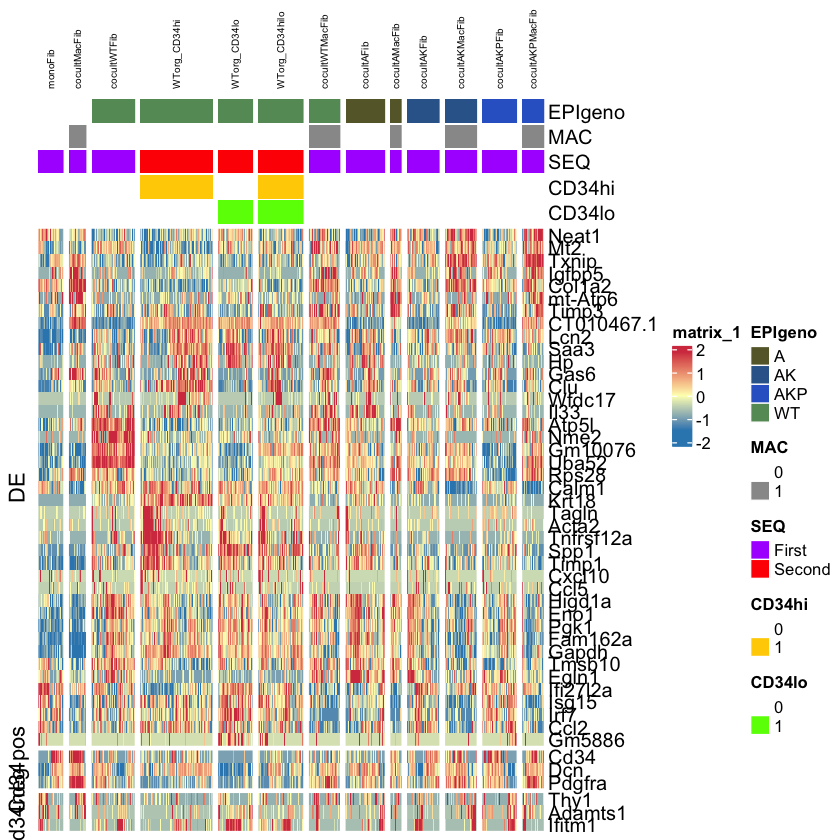

In [12]:
pHtmp_FIBconDE <- Heatmap(mat_FigS1_INTfib,
        column_split = d_FigS1_INTfib@meta.data$orig.ident,
        cluster_columns = TRUE, show_column_dend = FALSE, cluster_column_slices = FALSE,
        cluster_rows = FALSE, cluster_row_slices = FALSE, show_row_dend = FALSE,
        row_split = factor(
                        c(
                        rep("DE", 41),
                        rep("Cd34pos", 3),
                        rep("Cd34neg",3)
                        ),
                        levels = c(
                                "DE","Cd34pos","Cd34neg"
                                )
                        ),
        column_title_rot = 90, column_title_gp = gpar(fontsize=6),
        column_gap = unit(1.2, "mm"), show_column_names = FALSE,
        top_annotation = htmp_anno,
        use_raster = TRUE, raster_quality = 2,
        col=circlize::colorRamp2(
                c(round(quantile(mat_FigS1_INTfib, c(0.04,0.96))[1], digits = 1),
                0, 
                round(quantile(mat_FigS1_INTfib, c(0.04,0.96))[2], digits = 1)), 
                c("#3288BD", "#FEFEBD", "#D53E4F"))
        )

pHtmp_FIBconDE